In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grad - numpy

In [43]:
theta_mu = 1.0
theta_sigma = 2.0

In [44]:
def pi(theta_mu, theta_sigma):
    return np.random.normal(loc=theta_mu, scale=theta_sigma)

In [45]:
def x_mu(state):
    return 1.0

In [46]:
def x_sigma(state):
    return 1.0

In [47]:
def grad_ln_theta_mu(state, action, theta_mu, theta_sigma):
    return (1 / theta_sigma) * (action - theta_mu) * x_mu(state)  # Ex. 13.4

In [48]:
def grad_ln_theta_sigma(state, action, theta_mu, theta_sigma):
    return (((action - theta_mu) / theta_sigma) - 1) * x_sigma(state)

In [49]:
grad_ln_theta_mu(None, -2.0, theta_mu, theta_sigma)

-1.5

In [50]:
grad_ln_theta_sigma(None, -2.0, theta_mu, theta_sigma)

-2.5

In [51]:
aa = np.linspace(-3, 3)
mm = grad_ln_theta_mu(None, aa, theta_mu, theta_sigma)
ss = grad_ln_theta_sigma(None, aa, theta_mu, theta_sigma)

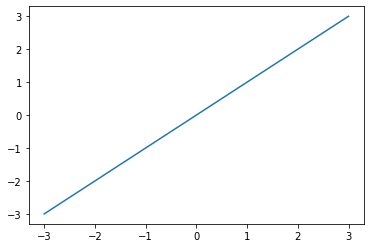

In [52]:
plt.plot(aa, gg)

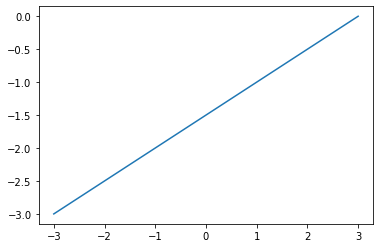

In [53]:
plt.plot(aa, ss)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def softmax(x):
    """Numerically stable softmax"""
    ex = np.exp(x - np.max(x))
    return ex / np.sum(ex)

In [4]:
nb_states = 1
nb_actions = 10

In [5]:
_theta = np.zeros((nb_states, nb_actions))

In [6]:
def pi_np(state):
    """Return policy, i.e. probability distribution over actions."""
    # Change 1:
    h_vec = _theta[state]
    prob_vec = softmax(h_vec)                     # shape=[n_act], e.q. 13.2
    return prob_vec

In [7]:
def grad_np(state, action):
    x_s = np.zeros(nb_actions)
    x_s[action] = 1             # feature vector, one-hot
    prob = pi_np(state)
    grad_s = x_s - prob
    return grad_s

In [8]:
pi_np(0)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [9]:
grad_np(0, 0)

array([ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1])

# Gradient - PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
nb_states = 1
nb_actions = 10

In [3]:
_theta_t = torch.zeros((nb_states, nb_actions), requires_grad=True)

In [4]:
def pi_t(state):
    """Return policy, i.e. probability distribution over actions."""
    with torch.no_grad():
        prob_t = torch.softmax(_theta_t[state], dim=-1)
        return prob_t.numpy()

In [5]:
def grad_t(state, action):
    prob_t = torch.softmax(_theta_t[state], dim=-1)
    log_t = torch.log(prob_t)
    loss = log_t[action]  # -1 grad ascent, scale by R
    loss.backward()
    
    grad = _theta_t.grad.data.numpy().copy()
    _theta_t.grad.data.zero_()
    return grad

In [6]:
pi_t(0)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)

In [7]:
grad_t(0, 0)

array([[ 0.90000004, -0.1       , -0.1       , -0.1       , -0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ]],
      dtype=float32)

# Gaussian - PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
def gaussian_t(x_t, mean, std):
    var = std**2
    denom = (2*np.pi*var)**.5
    num = torch.exp( -(x_t-mean)**2 / (2*var) )
    return num / denom

In [3]:
nb_states = 1
nb_actions = 10
lr = 0.1

In [4]:
_theta_mu_t = torch.zeros(nb_states, requires_grad=True)
_theta_sigma_t = torch.ones(nb_states, requires_grad=True)

In [5]:
# _dist = torch.distributions.Normal(_theta_mu_t, _theta_sigma_t)

In [6]:
def pi_t(state, mu_t, sigma_t):
    with torch.no_grad():
        #return np.random.normal(loc=theta_mu, scale=theta_sigma)
        return torch.normal(mu_t, sigma_t).item()

In [7]:
def print_plot(mu_t, sigma_t):
    print(mu_t, mu_t.grad)
    print(sigma_t, sigma_t.grad)
    
    with torch.no_grad():
        
        res = []
        for i in range(100000):
            res.append(pi_t(0, mu_t, sigma_t))
        plt.hist(res, bins=100, density=True)
        
        X_t = torch.linspace(-10, 10)
        Y_t = gaussian_t(X_t, mean=0.0, std=1.0)
        plt.plot(X_t.numpy(), Y_t.numpy())
        Y_t = gaussian_t(X_t, mean=mu_t, std=sigma_t)
        plt.plot(X_t.numpy(), Y_t.numpy(), color='red')
        
    plt.show()

tensor([0.], requires_grad=True) None
tensor([1.], requires_grad=True) None


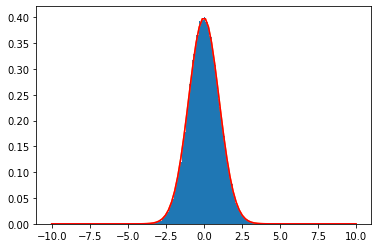

In [8]:
print_plot(_theta_mu_t, _theta_sigma_t)

In [195]:
lr = 1

In [308]:
prob_t = gaussian_t(5.0, _theta_mu_t, _theta_sigma_t)
print(prob_t)
print(prob_t.grad)

tensor([3.7060e-08], grad_fn=<DivBackward0>)
None


In [309]:
log_t = torch.log(prob_t)
print(log_t)
print(log_t.grad)

tensor([-17.1107], grad_fn=<LogBackward>)
None


In [310]:
loss = log_t
loss.backward()

In [311]:
print(log_t)
print(log_t.grad)

tensor([-17.1107], grad_fn=<LogBackward>)
None


In [312]:
print(_theta_mu_t)
print(_theta_mu_t.grad)

tensor([-19.9955], requires_grad=True)
tensor([1.1732])


In [313]:
print(_theta_sigma_t)
print(_theta_sigma_t.grad)

tensor([4.6158], requires_grad=True)
tensor([6.1365])


In [314]:
_theta_mu_t.data.add_(lr * _theta_mu_t.grad.data)
_theta_sigma_t.data.add_(lr * _theta_sigma_t.grad.data)
_theta_mu_t.grad.data.zero_()
_theta_sigma_t.grad.data.zero_()

tensor([0.])

tensor([-18.8223], requires_grad=True) tensor([0.])
tensor([10.7523], requires_grad=True) tensor([0.])


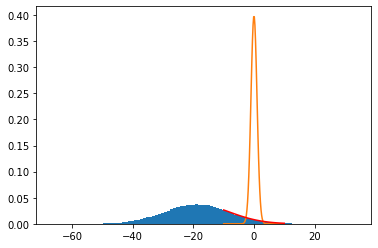

In [315]:
print_plot(_theta_mu_t, _theta_sigma_t)

In [ ]:
def grad_t(action, mean_t, std_t):
    prob_t = gaussian_t(action, mean_t, std_t)
    log_t = torch.log(prob_t)
    loss = log_t
    
    

In [ ]:
def grad_t(state, action):
    prob_t = torch.softmax(_theta_t[state], dim=-1)
    log_t = torch.log(prob_t)
    loss = log_t[action]  # -1 grad ascent, scale by R
    loss.backward()
    
    grad = _theta_t.grad.data.numpy().copy()
    _theta_t.grad.data.zero_()
    return grad